### MatplotLib

* Data Visualization is the representation of data in a graph or chart or other visual format
* Visual represenation of data makes it easier to identify patterns, trends 
* Visual representation grabs our attention 
* Python offers many libraries for visualization like Matplotlib, Seaborn, Plotly, Bokeh

`Matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python.
The most used module of `Matplotib` is `Pyplot` which provides an interface like MATLAB but instead, it uses Python and it is open source.

There are two styles in which `Matplotlib` can be used.
* **MATLAB Style** : 
    * Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact. 
    * The MATLAB-style tools are contained in the pyplot (plt) interface.
    * It is important to note MATLAB-style interface is stateful: it keeps track of the “current” figure and axes, which is  where all plt commands are applied. 

* **OBJECT-ORIENTED Style** :
    Rather than depending on some notion of an “active” figure or axes, in the object-oriented interface the plotting functions are methods of explicit Figure and Axes objects

**Understanding terms**
* **Figure:** It is the overall window/page that everything is drawn on.
* **Axes:** The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.
* **Axis:** These are the number-line-like objects. They take care of setting the graph limits and generating
the ticks (the marks on the axis) and ticklabels (strings labeling)
* **Artist:** Everything we see on the figure is an artist

![Python_PlotFigure.png](https://www.ntu.edu.sg/home/ehchua/programming/webprogramming/images/Python_PlotFigure.png)
<div style="font-size: 12px", align="center">
    Figure 1. General location of elements in a Matplotlib chart. 
</div >

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [5]:
## Read data
df  = pd.read_excel('./data/Metropolitan_Data.xlsx')

In [6]:
## Glimpse at data
df.head(3)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.554916
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.029927
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.322904


In [7]:
## shape
df.shape

(99, 10)

In [10]:
## check of nulls
df.isna().sum()

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
work_force        0
income            0
region            0
crime_rate        0
dtype: int64

In [30]:
df['region']=df['region'].astype('category')

In [31]:
## describe
df.dtypes

land_area            int64
percent_city       float64
percent_senior     float64
physicians           int64
hospital_beds        int64
graduates          float64
work_force         float64
income               int64
region            category
crime_rate         float64
dtype: object

### Scatter plot

- A scatter plot  uses dots to represent data points 
- Scatter plots are used to observe relationships between variables.

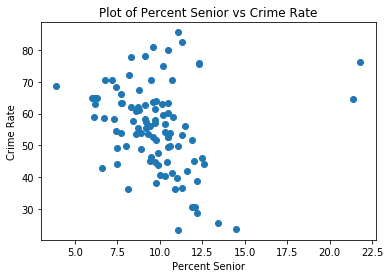

In [22]:
# Matlab Style

# Here we are creating a scatter plot between crime rate and percent senior variables

plt.scatter(x='percent_senior', y='crime_rate', data=df)

plt.title('Plot of Percent Senior vs Crime Rate') # Adding a title to the plot

plt.xlabel("Percent Senior") # Adding the label for the horizontal axis

plt.ylabel("Crime Rate") # Adding the label for the vertical axis

plt.show()


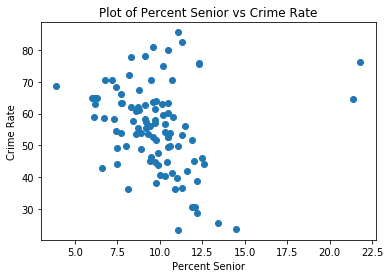

In [23]:
## Object Oriented Style

fig, ax = plt.subplots()

ax.scatter('percent_senior', 'crime_rate', data=df)
ax.set_xlabel("Percent Senior")
ax.set_ylabel("Crime Rate")
ax.set_title('Plot of Percent Senior vs Crime Rate')
plt.show()

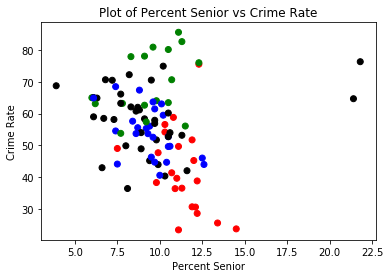

In [42]:
## Setting colors for different Regions
colors = {1:'red', 2:'blue', 3:'black', 4:'green'}

fig, ax = plt.subplots()
ax.scatter('percent_senior', 'crime_rate', data=df, c=df['region'].map(colors))
ax.set_xlabel("Percent Senior")
ax.set_ylabel("Crime Rate")
ax.set_title('Plot of Percent Senior vs Crime Rate')
plt.show()

### Lineplot

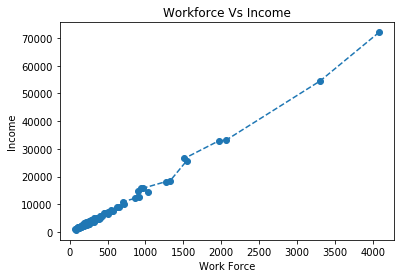

In [51]:
# Matlab Style 

plt.plot('work_force', 'income', marker='o', linestyle='--', data=df)

plt.xlabel('Work Force')
plt.ylabel('Income')
plt.title('Workforce Vs Income')
plt.show()

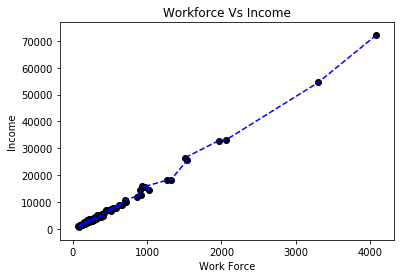

In [52]:
## Object Oriented Style

fig, ax = plt.subplots()

ax.plot('work_force', 'income', linestyle='--', color='blue', data=df)
ax.scatter('work_force', 'income', marker='o', color='black', data=df)
ax.set_xlabel('Work Force')
ax.set_ylabel('Income')
ax.set_title('Workforce Vs Income')
plt.show()

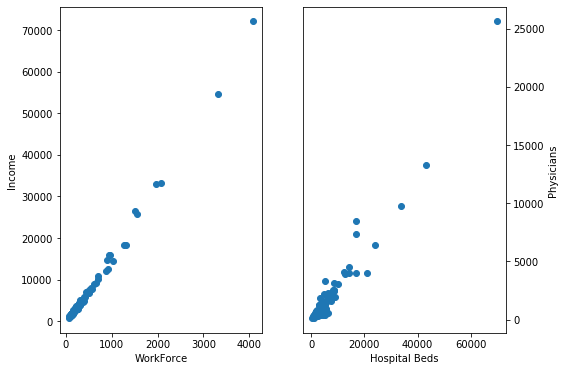

In [64]:
## Subplots next to each other

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,6))

ax[0].scatter('work_force', 'income',  data=df)
ax[0].set_xlabel('WorkForce')
ax[0].set_ylabel('Income')

ax[1].scatter('hospital_beds', 'physicians',  data=df)
ax[1].set_xlabel('Hospital Beds')
ax[1].set_ylabel('Physicians')
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()


plt.show()

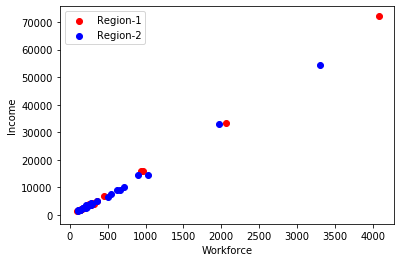

In [76]:
# Legends Workforce Vs Income of Region 1 and 2

fig, ax = plt.subplots()

ax.scatter('work_force', 'income', color='r', label='Region-1',  data=df[df.region==1])
ax.scatter('work_force', 'income', color='b', label='Region-2',  data=df[df.region==2])

ax.set_xlabel('Workforce')
ax.set_ylabel('Income')
ax.legend()
plt.show()


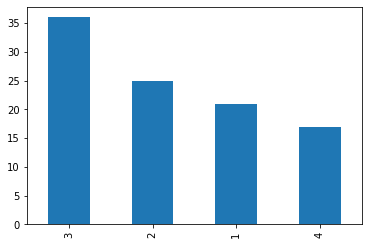

In [79]:
## Barplot
df.region.value_counts().plot(kind='bar')

In [108]:
# Total no. of hostipal beds in each region
g = df.groupby('region')
beds_frame = g[['hospital_beds']].sum()
beds_frame

,hospital_beds
region,
1,202752
2,179307
3,178660
4,67522


In [214]:
beds_frame.index

CategoricalIndex([1, 2, 3, 4], categories=[1, 2, 3, 4], ordered=False, name='region', dtype='category')

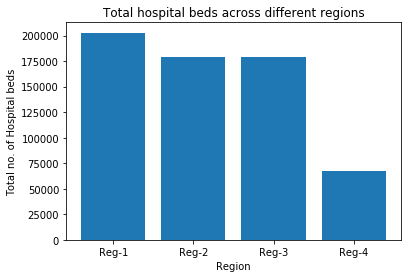

In [115]:
# Barplot
fig, ax = plt.subplots()

ax.bar(beds_frame.index, beds_frame.hospital_beds)

ax.set_xlabel('Region')
ax.set_ylabel('Total no. of Hospital beds')
ax.set_title('Total hospital beds across different regions')

x_ticks_labels =  ['Reg-' + str(i) for i in beds_frame.index]
ax.set_xticks(beds_frame.index)
ax.set_xticklabels(x_ticks_labels)
plt.show()

### Histogram

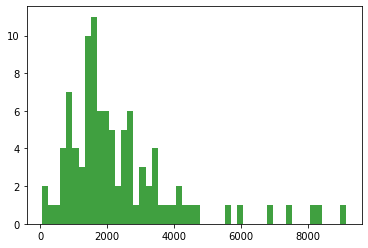

In [218]:
fig, ax = plt.subplots()

ax.hist(df.land_area,bins=50,facecolor='g', alpha=0.75)

plt.show()

In [123]:
df.land_area.describe()

count       99.000000
mean      2615.727273
std       3045.826210
min         47.000000
25%       1408.000000
50%       1951.000000
75%       2890.500000
max      27293.000000
Name: land_area, dtype: float64

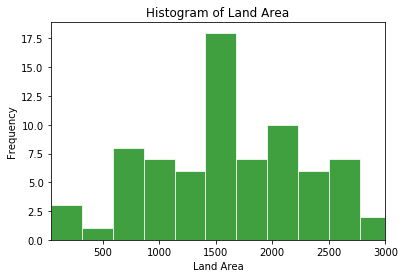

In [140]:
# Histogram
fig, ax = plt.subplots()

ax.hist(df.land_area, bins=100, facecolor='g', edgecolor='white', alpha=0.75)

ax.set_xlabel('Land Area')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Land Area')
ax.set_xlim(40, 3000)
plt.show()

### Boxplot

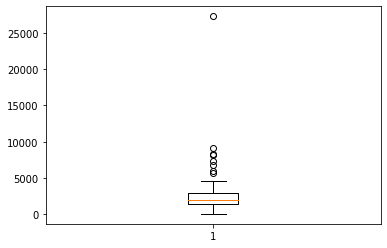

In [156]:
fig, ax = plt.subplots()


ax.boxplot(df.land_area)
plt.show()

In [158]:
df.land_area.max()

27293

In [164]:
np.percentile(df.land_area, q=99)

9517.759999999927

In [168]:
df[df.land_area == df.land_area.max()]

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
18,27293,25.3,12.3,2018,6323,57.4,510.6,7399,4,76.028331


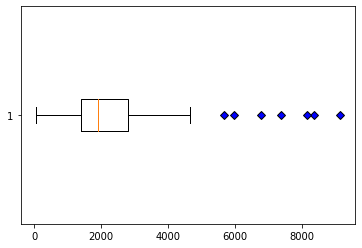

In [179]:
# Boxplot excluding 1 outlier point

fig, ax = plt.subplots()

blue_diamond = dict(markerfacecolor='b', marker='D')

land = df.drop([18])['land_area']

ax.boxplot(land, vert=False, flierprops=blue_diamond)
plt.show()

In [178]:
np.percentile(land, [25, 50, 75])

array([1406.  , 1907.  , 2802.75])

In [196]:
df.drop([18], inplace=True) # remove that extreme outlier datapoint

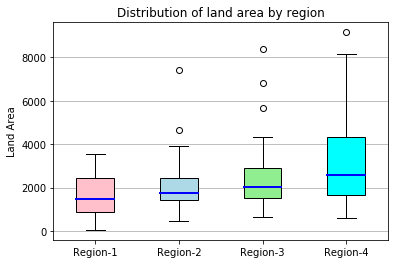

In [213]:
## Boxplot

reg1_land = df[df.region == 1]['land_area']
reg2_land = df[df.region == 2]['land_area']
reg3_land = df[df.region == 3]['land_area']
reg4_land = df[df.region == 4]['land_area']

fig, ax = plt.subplots()

boxplots = ax.boxplot([reg1_land, reg2_land, reg3_land, reg4_land], 
                      labels=['Region-1', 'Region-2', 'Region-3', 'Region-4'],
                     medianprops = dict(linestyle='-', linewidth=2, color='blue'),
                     patch_artist=True)

box1 = boxplots['boxes'][0]
box1.set_facecolor('pink')

box2 = boxplots['boxes'][1]
box2.set_facecolor('lightblue')

box3 = boxplots['boxes'][2]
box3.set_facecolor('lightgreen')

box4 = boxplots['boxes'][3]
box4.set_facecolor('cyan')

ax.yaxis.grid(True)

ax.set_title('Distribution of land area by region')
ax.set_ylabel('Land Area')

plt.show()